## Data Introduction

Dataset emails berisi informasi terkait dari 5172 file email yang dipilih secara acak dan labelnya masing-masing untuk klasifikasi spam atau bukan-spam.

Terdapat 3002 kolom pada dataset. 
Kolom pertama menunjukkan nama Email. 
Nama telah diatur dengan angka dan bukan nama penerima untuk melindungi privasi. 
Kolom terakhir diberi label untuk prediksi : 1 untuk spam, 0 untuk bukan spam. 
3000 kolom yang tersisa adalah 3000 kata paling umum di semua email, setelah mengecualikan karakter/kata non-abjad. Untuk setiap baris, jumlah setiap kata (kolom) di email (baris) tersebut disimpan di sel masing-masing. Dengan demikian, informasi mengenai semua 5172 email disimpan dalam kerangka data yang ringkas, bukan sebagai file teks terpisah.

In [57]:
# First we'll import all libraries that will be used in this project
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# encoding
from sklearn import preprocessing

# split data
from sklearn.model_selection import train_test_split

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics

##Load and Understanding Data

In [58]:
df = pd.read_csv('emails.csv')

In [59]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [60]:
df.shape

(5172, 3002)

In [61]:
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [62]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [63]:
# check for duplicates
df.duplicated().sum()

0

##Observations:
1. Dataset terdiri dari 5172 baris dan 3002 kolom
2. Tidak terdapat data duplikat pada dataset
3. Nilai min dan max pada prediction tida terlalu berbeda range 0-1

##Data Preprocessing

In [8]:
# Remove column "Email name" that not relevant for the prediction
df = df.drop(columns=['Email No.'])

In [9]:
# Replace non-numeric characters with NaN values
df = df.replace(r'[^\d.]+', value=float('nan'), regex=True)

In [10]:
# Fill missing values with 0
df.fillna(0, inplace=True)

In [11]:
# Convert the data into integer type
df = df.astype(int)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,1,1,0,0,0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,1
167,2,2,2,1,5,1,24,2,0,5,...,0,0,0,0,0,0,0,0,0,1
168,10,9,3,2,3,3,38,3,0,19,...,0,0,0,0,0,0,0,1,0,0
169,1,0,1,0,0,1,23,0,0,4,...,0,1,0,0,0,0,0,0,0,1


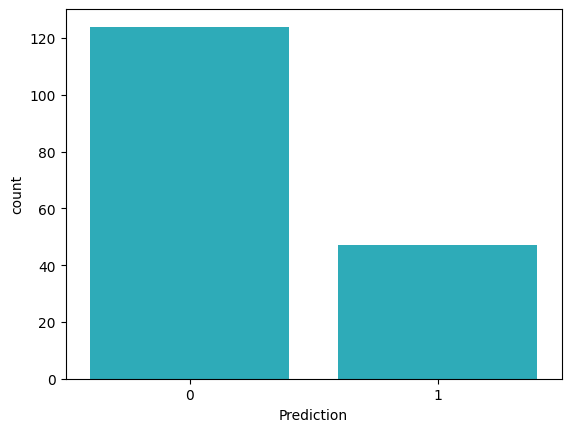

In [12]:
#Comparing the number of emails that are spam and not spam
sns.countplot(data=df, x='Prediction', color=sns.color_palette()[9])
plt.show();

Observation:
Proporsi email bukan spam (0) lebih besar dibandingkan dengan email spam (1)

##Split the data: training & testing

In [13]:
X = df.drop(columns='Prediction', axis=1)
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##Model Prediction

In [14]:
# It's important to choose the right metric when doing classification
df['Prediction'].value_counts()

0    124
1     47
Name: Prediction, dtype: int64

The class distribution is IMBALANCE, so need NOT to use accuracy. Use recall (sensitivity) instead!

In [15]:
# define the estimator/model
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()
dtree_model = DecisionTreeClassifier()
svm_model = SVC()
NB_model = GaussianNB()
NN_model = MLPClassifier()

#**Logistic Regression**

In [19]:
# DEPENDENT VARIABLE
y = df.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [20]:
model_LR = SGDClassifier(loss="log")
print(model_LR.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [22]:
logistic = SGDClassifier(loss="log")
print(logistic.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [24]:
logistic.fit(X, y)
print(f"Model weights: {logistic.coef_}, bias: {logistic.intercept_}")
y_pred = logistic.predict(X)

Model weights: [[ -416.85025346  -385.29282255 -1196.24253487 ...     0.
    132.1003963      0.        ]], bias: [-496.05660442]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [26]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       124
           1       0.88      0.89      0.88        47

    accuracy                           0.94       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.94      0.94      0.94       171



##Evaluation metrics on test data Logistic Regression

In [30]:
cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[118,   6],
       [  5,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

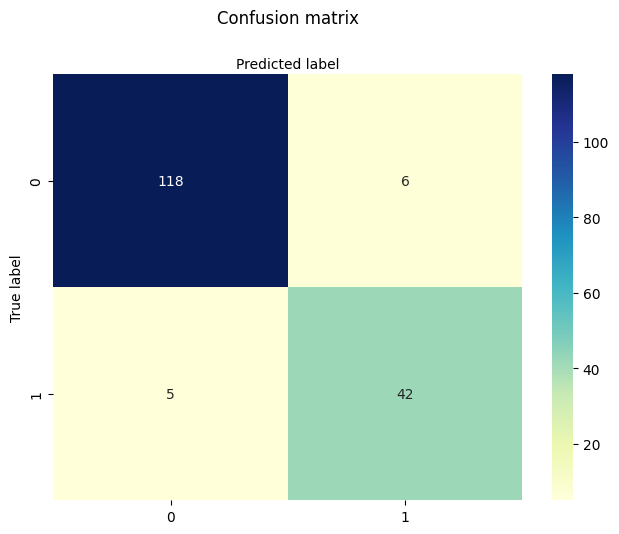

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [33]:
# accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1-Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.935672514619883
Precision: 0.875
Recall: 0.8936170212765957
F1-Score: 0.8842105263157894


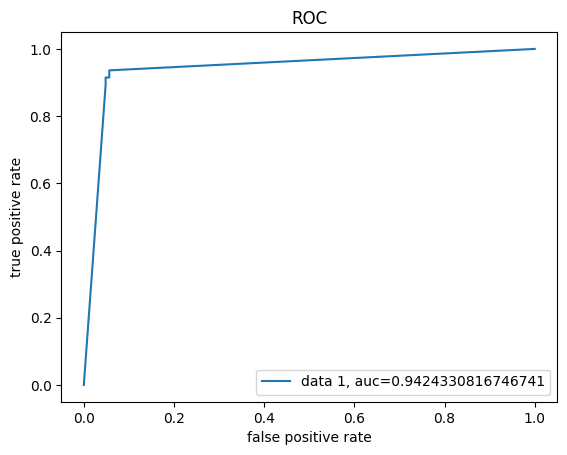

In [35]:
# ROC Curve
y_pred_proba = logistic.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

#**KNN**

In [38]:
# Nearest Neighbors Classifier
n_neighbors = 22
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
print(clf.get_params())

# Train model
clf.fit(X_train, y_train)

# test
y_pred_knn = clf.predict(X_test)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


##Evaluation Test data

[[41  0]
 [10  1]]


Text(0.5, 427.9555555555555, 'Predicted label')

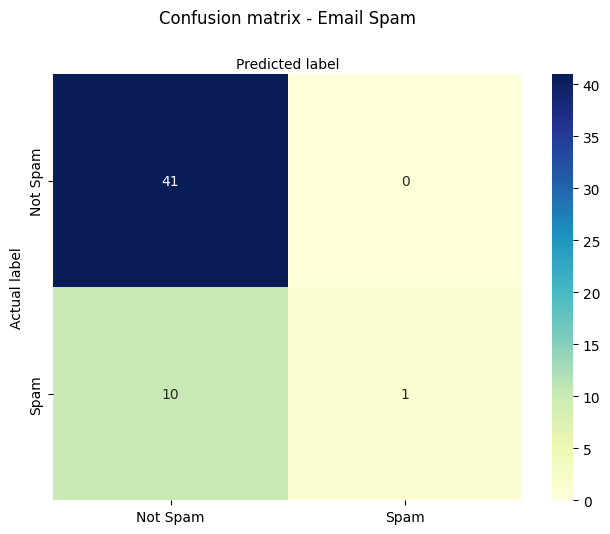

In [39]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1-Score:", metrics.f1_score(y_test, y_pred_knn))

Accuracy: 0.8076923076923077
Precision: 1.0
Recall: 0.09090909090909091
F1-Score: 0.16666666666666669


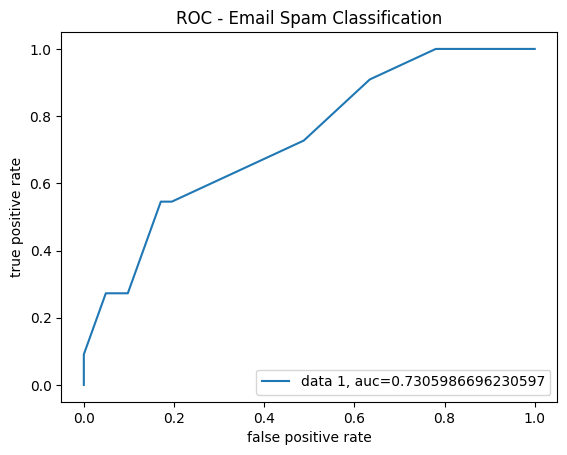

In [42]:
# ROC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification')
plt.legend(loc=4)
plt.show()

#**Decission Tree**

In [43]:
#DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
print(clf_tree.get_params())

# Train model
clf_tree.fit(X_train, y_train)

# test
y_pred_tree = clf.predict(X_test)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[[41  0]
 [10  1]]


Text(0.5, 427.9555555555555, 'Predicted label')

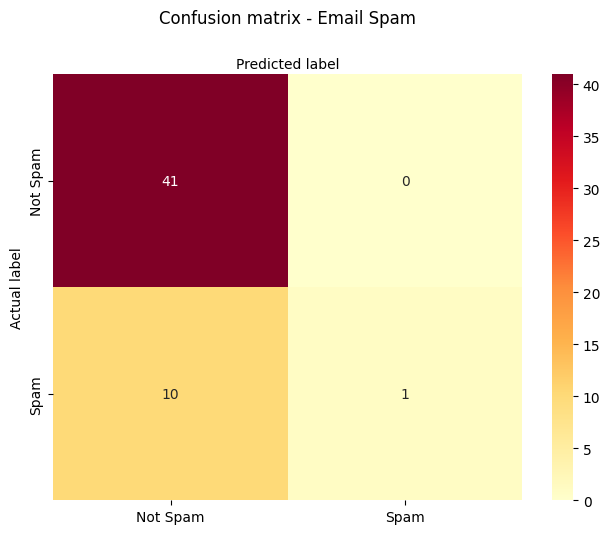

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_tree)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

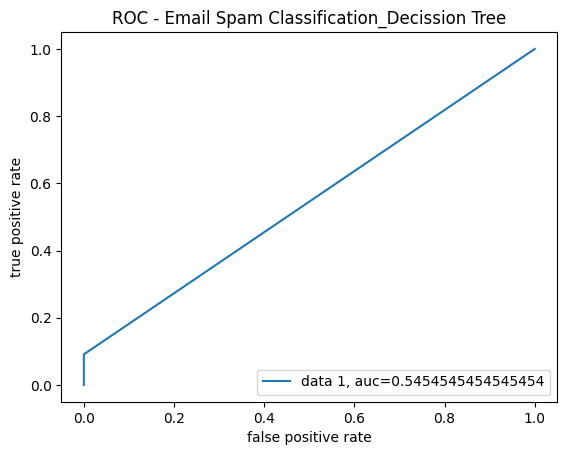

In [45]:
# ROC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_tree)
auc = metrics.roc_auc_score(y_test, y_pred_tree)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Decission Tree')
plt.legend(loc=4)
plt.show()

#**SVM**

In [46]:
# buat classifier untuk SVC
clf = SVC(probability=True)
print(clf.get_params())

# Train model
clf.fit(X_train, y_train)

# test
y_pred_svm = clf.predict(X_test)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


##Evaluation Model

[[40  1]
 [10  1]]


Text(0.5, 427.9555555555555, 'Predicted label')

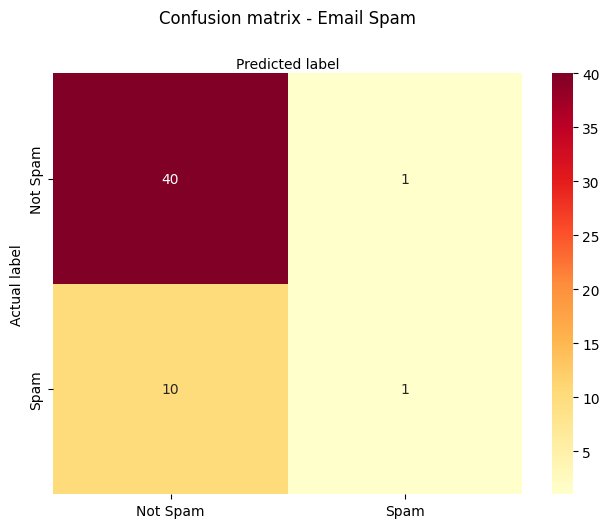

In [48]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

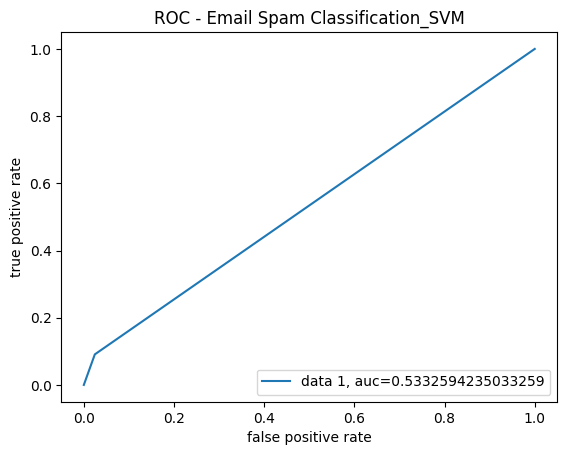

In [49]:
# ROC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_svm)
auc = metrics.roc_auc_score(y_test, y_pred_svm)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_SVM')
plt.legend(loc=4)
plt.show()

#**NAIVE BAYES**

In [52]:
# naive bayes classifier
clf = GaussianNB()
print(clf.get_params())

# Train model
clf.fit(X_train, y_train)

# test
y_pred_gaus = clf.predict(X_test)

{'priors': None, 'var_smoothing': 1e-09}


##Evaluation Model

[[39  2]
 [ 1 10]]


Text(0.5, 427.9555555555555, 'Predicted label')

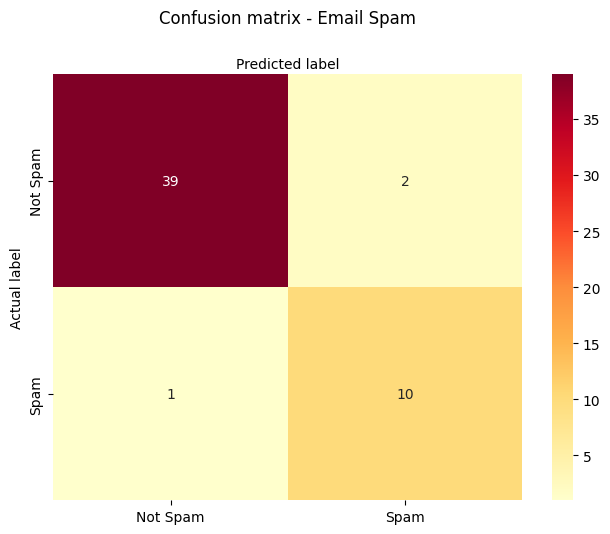

In [53]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_gaus)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

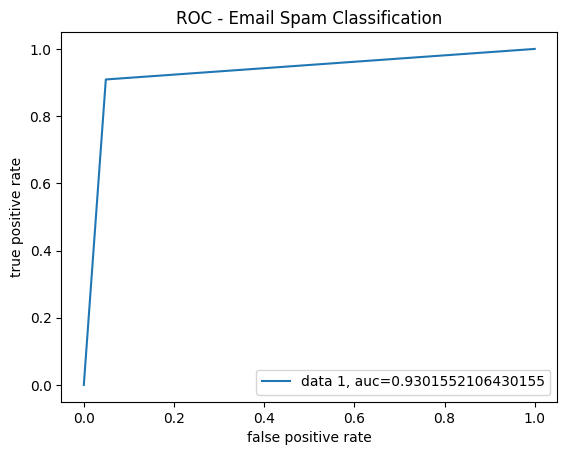

In [64]:
# ROC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gaus)
auc = metrics.roc_auc_score(y_test, y_pred_gaus)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification')
plt.legend(loc=4)
plt.show()

#**Neural Network**

In [55]:
# MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(200,150,50),
                    max_iter = 100000,activation = 'relu',
                    solver = 'adam')
print(clf.get_params())

# Train model
clf.fit(X_train, y_train)

# test
y_pred_nn = clf.predict(X_test)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 150, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


##Evaluation Model

In [66]:
# buat classifier untuk MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(200,150,50),
                    max_iter = 100000,activation = 'relu',
                    solver = 'adam')
print(clf.get_params())

# Train model
clf.fit(X_train, y_train)

# test
y_pred_nn = clf.predict(X_test)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 150, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


[[40  1]
 [ 1 10]]


Text(0.5, 427.9555555555555, 'Predicted label')

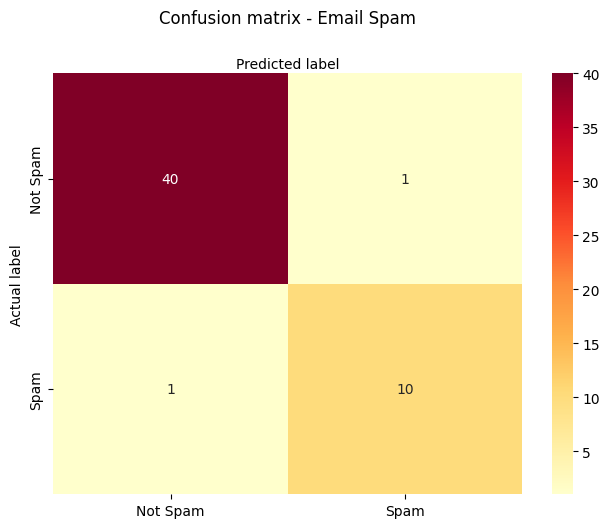

In [67]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(y_test, y_pred_nn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

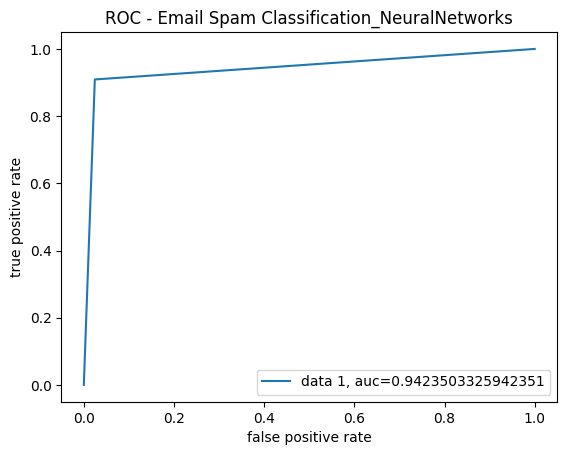

In [68]:
# ROC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_nn)
auc = metrics.roc_auc_score(y_test, y_pred_nn)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_NeuralNetworks')
plt.legend(loc=4)
plt.show()

In [73]:
#Training for Another Model
knn_model.fit(X_train, y_train)
dtree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
NB_model.fit(X_train, y_train)
NN_model.fit(X_train, y_train)

MLPClassifier()

In [74]:
#Training for Another Model
knn_model.fit(X_train, y_train)
dtree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
NB_model.fit(X_train, y_train)
NN_model.fit(X_train, y_train)

MLPClassifier()

In [75]:
#Evaluate the Model
logi_pred = logistic_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
dtree_pred = dtree_model.predict(X_test)
svmmodel_pred = svm_model.predict(X_test)
NB_model_pred = NB_model.predict(X_test)
NN_model_pred = NN_model.predict(X_test)

#**SUMMARY REPORT**

In [76]:
## print classification report
print("\033[1m" + "LOGISTIC REGRESSION : " + "\033[0m")
print(classification_report(logi_pred, y_test))

print("\033[1m" + "KNN : " + "\033[0m")
print(classification_report(knn_pred, y_test))

print("\033[1m" + "DECISION TREE : " + "\033[0m")
print(classification_report(dtree_pred, y_test))

print("\033[1m" + "SVM : " + "\033[0m")
print(classification_report(svmmodel_pred, y_test))

print("\033[1m" + "NAIVE BAYES : "  + "\033[0m")
print(classification_report(NB_model_pred, y_test))

print("\033[1m" + "NEURAL NETWORK : " + "\033[0m")
print(classification_report(NN_model_pred, y_test))

LOGISTIC REGRESSION : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.73      0.67      0.70        12

    accuracy                           0.87        52
   macro avg       0.81      0.80      0.80        52
weighted avg       0.86      0.87      0.86        52

KNN : 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.64      0.70      0.67        10

    accuracy                           0.87        52
   macro avg       0.78      0.80      0.79        52
weighted avg       0.87      0.87      0.87        52

DECISION TREE : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.73      0.67      0.70        12

    accuracy                           0.87        52
   macro avg       0.81      0.80      0.80        52
weighted avg       0.86    

# **Conclusion**

Based on the model_performance result, the Naive Bayes seems to be the best among all the models with highest recall. This suggests that the Naive Bayes has the highest ability to correctly identify emails as spam or not spam, with minimal false positives and false negatives.